In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os

# Google Drive 내의 data 폴더 경로 설정
file_path = '/content/drive/My Drive/data/0825_해지.csv'  # 경로는 실제 폴더 구조에 따라 변경

# 출력 파일 경로 설정
output_path_excel = '/content/drive/My Drive/data/해지_조건추출.xlsx'
output_path_csv = '/content/drive/My Drive/data/해지_조건추출.csv'

# 파일 경로 확인 및 데이터 처리
if os.path.exists(file_path):
    try:
        # 첫 번째 행을 헤더로 지정하여 CSV 파일 읽기
        df = pd.read_csv(file_path, encoding='cp949', header=1, low_memory=False)

        # 관리본부명 수정 (서부본부 -> 강남/서부본부, 강원본부 -> 강북/강원본부)
        df['관리본부명'] = df['관리본부명'].replace({'서부본부': '강남/서부본부', '강원본부': '강북/강원본부'})

        # 조건에 맞는 데이터 필터링 (요금구분이 '대상', 서비스(대)가 '기본서비스', 계약상태(대)가 '해지')
        filtered_df = df[
            (df['요금구분'] == '대상') &
            (df['서비스(대)'] == '기본서비스') &
            (df['계약상태(대)'] == '해지')
        ]

        # 열 선택 및 순서 지정
        selected_columns = [
            '관리본부명', '관리지사명', '고객번호', '계약번호', '서비스번호',
            '서비스(대)', '서비스(중)', '서비스(소)', '고객명', '상호', '고객구분',
            '견적월정료', 'KTT월정료(조정)', '계약개월수', '월정료면제사유', '면제시작일',
            '면제종료일', '판매상품비', '견적설치공사비', '면제공사비', '실징수액',
            '영업본부명', '영업지사명', '영업자사번', '영업자명', '영업자본부', '영업자지사',
            '영업채널', '추천본부명', '추천지사명', '유통망대분류', '추천자사번',
            '추천자본부', '추천자명', '추천채널', '시설구분', '요금구분', '판매구분',
            '고객계약유형', '실적최초등록일', '출동구역정보', '완결청약구분', '매출구분',
            '영업본부2', '영업지사2', 'BM구분_L1', 'BM구분_L2', '고알프', '고객등급',
            '속성구분_L1', 'KT월정료(조정)'
        ]

        final_df = filtered_df[selected_columns]

        # 천 단위로 KTT월정료(조정) 포맷팅
        final_df['KTT월정료(조정)'] = final_df['KTT월정료(조정)'].apply(lambda x: f"{int(x):,}")

        # 엑셀 및 CSV 파일로 저장
        final_df.to_excel(output_path_excel, index=False)
        final_df.to_csv(output_path_csv, index=False, encoding='cp949')

        print("파일 저장이 완료되었습니다.")
    except Exception as e:
        print(f"파일을 처리하는 중 오류가 발생했습니다: {e}")
else:
    print("파일이 존재하지 않습니다. 파일 경로와 파일명을 확인하세요.")

<ipython-input-2-8066c7f9f71a>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['KTT월정료(조정)'] = final_df['KTT월정료(조정)'].apply(lambda x: f"{int(x):,}")


파일 저장이 완료되었습니다.


In [ ]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 설치한 폰트를 matplotlib에 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 한글 폰트를 적용
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


TypeError: no numeric data to plot

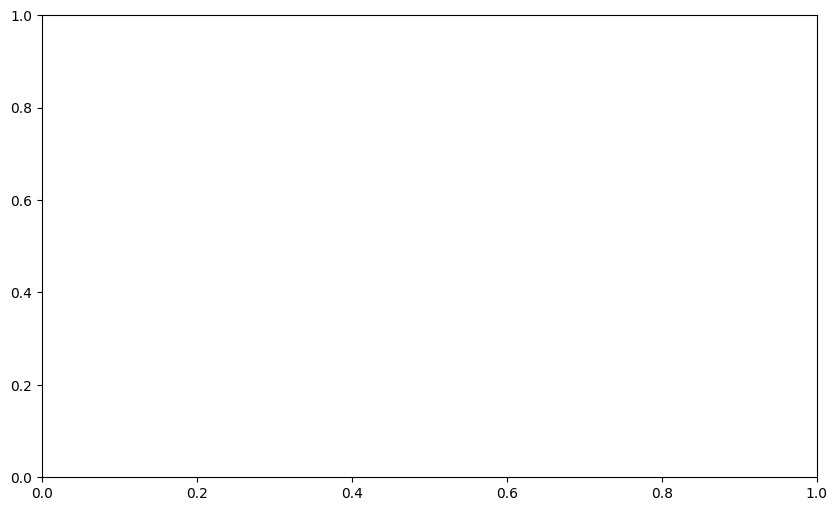

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽기
df = pd.read_csv(output_path_csv, encoding='cp949')

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('관리지사명')
plt.ylabel('월정료 합계 (천단위)')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

<ipython-input-13-70c3cde2903c>:20: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-13-70c3cde2903c>:20: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-13-70c3cde2903c>:20: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-13-70c3cde2903c>:20: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-13-70c3cde2903c>:20: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-13-70c3cde2903c>:20: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-13-70c3cde2903c>:20: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-13-70c3cde2903c>:20: UserWarning: Glyp

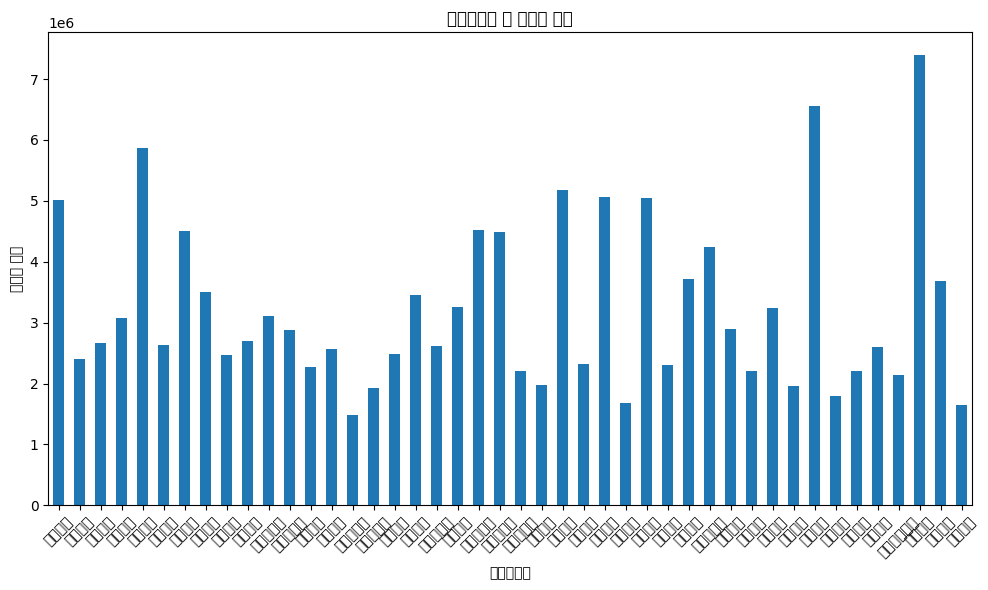

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽기
df = pd.read_csv(output_path_csv, encoding='cp949')

# 'KTT월정료(조정)' 컬럼을 숫자형으로 변환 (콤마 제거 후 정수형으로 변환)
df['KTT월정료(조정)'] = df['KTT월정료(조정)'].str.replace(',', '').astype(int)

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('관리지사명')
plt.ylabel('월정료 합계') # 천단위 표시 제거
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

<ipython-input-14-23dc030c5690>:32: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-23dc030c5690>:32: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-14-23dc030c5690>:32: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-14-23dc030c5690>:32: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-14-23dc030c5690>:32: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-23dc030c5690>:32: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-23dc030c5690>:32: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-14-23dc030c5690>:32: UserWarning: Glyp

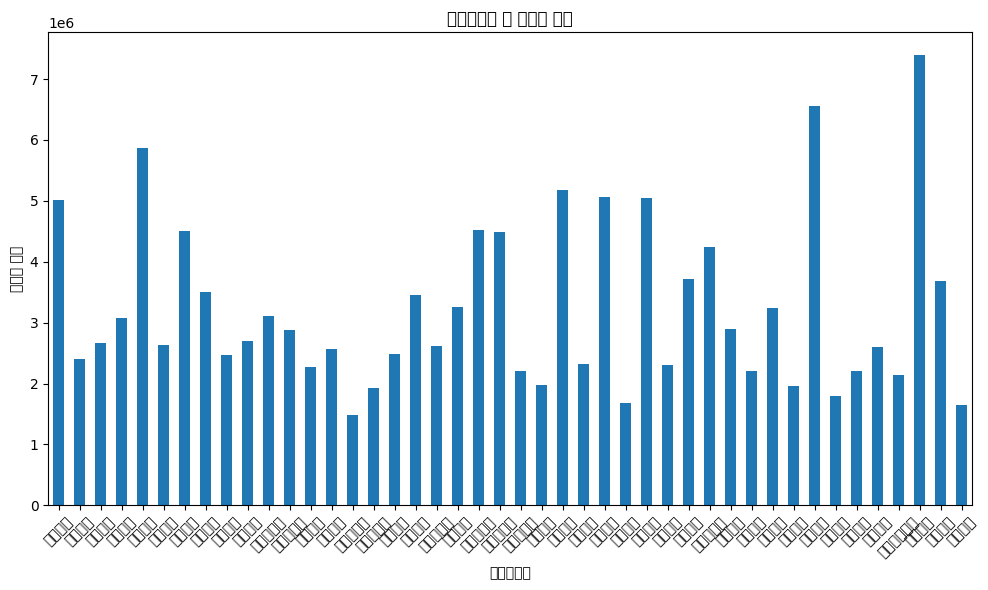

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록 확인
font_list = fm.findSystemFonts()
# 'Nanum'이 포함된 폰트 찾기
nanum_fonts = [font for font in font_list if 'Nanum' in font]

# Nanum 폰트가 설치되어 있다면 첫 번째 폰트를 사용
if nanum_fonts:
    plt.rc('font', family=nanum_fonts[0])
else:
    print("Nanum 폰트가 설치되어 있지 않습니다. 설치 후 다시 실행해주세요.")

# 데이터 읽기
df = pd.read_csv(output_path_csv, encoding='cp949')

# 'KTT월정료(조정)' 컬럼을 숫자형으로 변환 (콤마 제거 후 정수형으로 변환)
df['KTT월정료(조정)'] = df['KTT월정료(조정)'].str.replace(',', '').astype(int)

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('관리지사명')
plt.ylabel('월정료 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

<ipython-input-15-23dc030c5690>:32: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-15-23dc030c5690>:32: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-15-23dc030c5690>:32: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-15-23dc030c5690>:32: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-15-23dc030c5690>:32: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-15-23dc030c5690>:32: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-15-23dc030c5690>:32: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-15-23dc030c5690>:32: UserWarning: Glyp

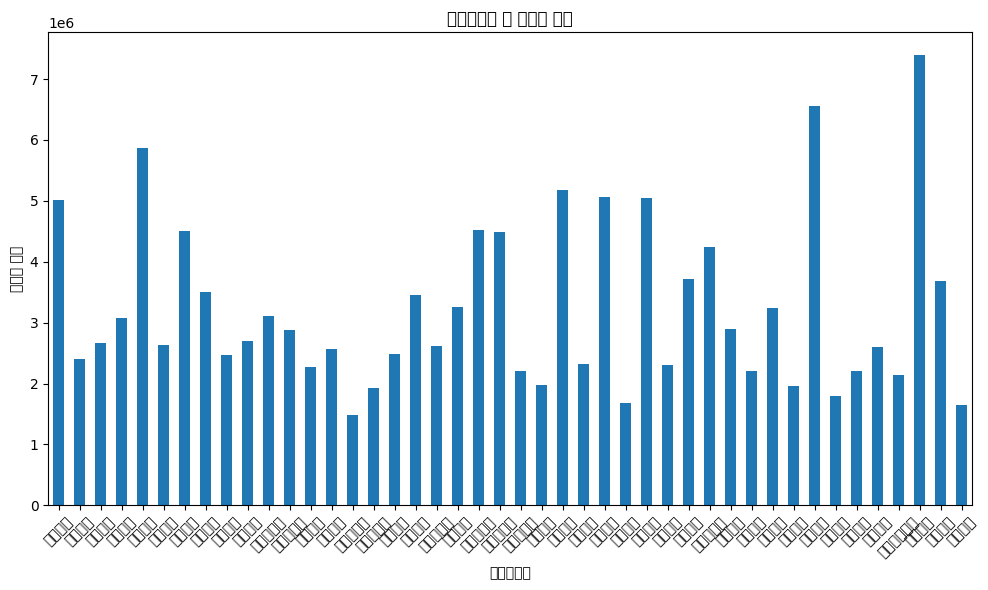

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록 확인
font_list = fm.findSystemFonts()
# 'Nanum'이 포함된 폰트 찾기
nanum_fonts = [font for font in font_list if 'Nanum' in font]

# Nanum 폰트가 설치되어 있다면 첫 번째 폰트를 사용
if nanum_fonts:
    plt.rc('font', family=nanum_fonts[0])
else:
    print("Nanum 폰트가 설치되어 있지 않습니다. 설치 후 다시 실행해주세요.")

# 데이터 읽기
df = pd.read_csv(output_path_csv, encoding='cp949')

# 'KTT월정료(조정)' 컬럼을 숫자형으로 변환 (콤마 제거 후 정수형으로 변환)
df['KTT월정료(조정)'] = df['KTT월정료(조정)'].str.replace(',', '').astype(int)

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('관리지사명')
plt.ylabel('월정료 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


<ipython-input-18-1bd80fac70c0>:24: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-18-1bd80fac70c0>:24: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-18-1bd80fac70c0>:24: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-18-1bd80fac70c0>:24: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-18-1bd80fac70c0>:24: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-18-1bd80fac70c0>:24: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-18-1bd80fac70c0>:24: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-18-1bd80fac70c0>:24: UserWarning: Glyp

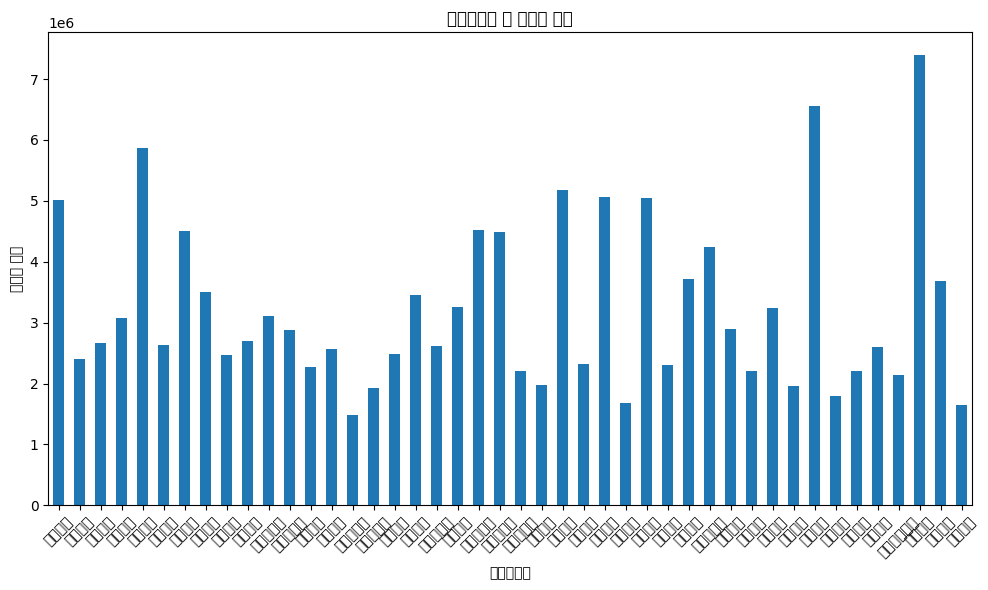

In [ ]:
# 한글 폰트 설치 및 설정
!apt-get install -y fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

import pandas as pd

# 데이터 읽기
df = pd.read_csv(output_path_csv, encoding='cp949')

# 'KTT월정료(조정)' 컬럼을 숫자형으로 변환 (콤마 제거 후 정수형으로 변환)
df['KTT월정료(조정)'] = df['KTT월정료(조정)'].str.replace(',', '').astype(int)

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('관리지사명')
plt.ylabel('월정료 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 파일 경로 (아이패드에 저장된 폰트 파일 경로)
font_path = 'path/to/your/font.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 폰트 적용
plt.title('제목', fontproperties=fontprop)
plt.xlabel('x축 레이블', fontproperties=fontprop)
plt.ylabel('y축 레이블', fontproperties=fontprop)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 파일 경로 (아이패드에 저장된 폰트 파일 경로)
font_path = 'path/to/your/font.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 폰트 적용
plt.title('제목', fontproperties=fontprop)
plt.xlabel('x축 레이블', fontproperties=fontprop)
plt.ylabel('y축 레이블', fontproperties=fontprop)

<ipython-input-19-c0e42d718e20>:24: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-19-c0e42d718e20>:24: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-19-c0e42d718e20>:24: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-19-c0e42d718e20>:24: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-19-c0e42d718e20>:24: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-19-c0e42d718e20>:24: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-19-c0e42d718e20>:24: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-19-c0e42d718e20>:24: UserWarning: Glyp

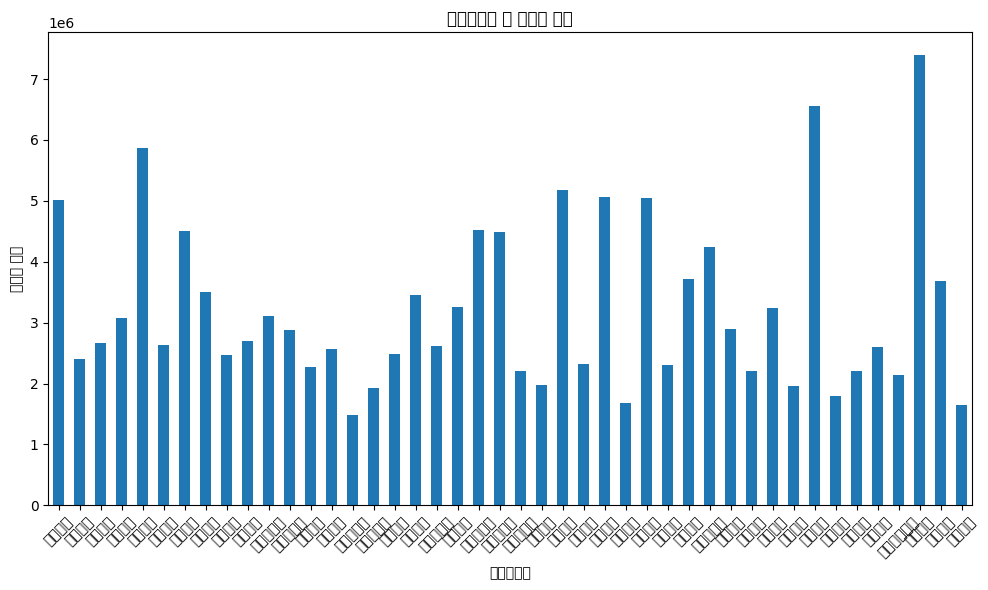

In [ ]:
import matplotlib.pyplot as plt

# 한글을 지원하는 폰트 설정 (예: DejaVu Sans)
plt.rcParams['font.family'] = 'DejaVu Sans'

import pandas as pd

# 데이터 읽기
df = pd.read_csv(output_path_csv, encoding='cp949')

# 'KTT월정료(조정)' 컬럼을 숫자형으로 변환 (콤마 제거 후 정수형으로 변환)
df['KTT월정료(조정)'] = df['KTT월정료(조정)'].str.replace(',', '').astype(int)

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('관리지사명')
plt.ylabel('월정료 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 한글을 지원하는 폰트 설정 (예: DejaVu Sans)
plt.rcParams['font.family'] = 'DejaVu Sans'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 파일 경로 (아이패드에 저장된 폰트 파일 경로)
font_path = 'path/to/your/font.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 폰트 적용
plt.title('제목', fontproperties=fontprop)
plt.xlabel('x축 레이블', fontproperties=fontprop)
plt.ylabel('y축 레이블', fontproperties=fontprop)

Text(0, 0.5, 'y축 레이블')

Error in callback <function _draw_all_if_interactive at 0x7cf85dc793f0> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: '/content/path/to/your/font.ttf'

FileNotFoundError: [Errno 2] No such file or directory: '/content/path/to/your/font.ttf'

<Figure size 640x480 with 1 Axes>

<ipython-input-22-c0e42d718e20>:24: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-22-c0e42d718e20>:24: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
<ipython-input-22-c0e42d718e20>:24: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-22-c0e42d718e20>:24: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-22-c0e42d718e20>:24: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-22-c0e42d718e20>:24: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-22-c0e42d718e20>:24: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-22-c0e42d718e20>:24: UserWarning: Glyp

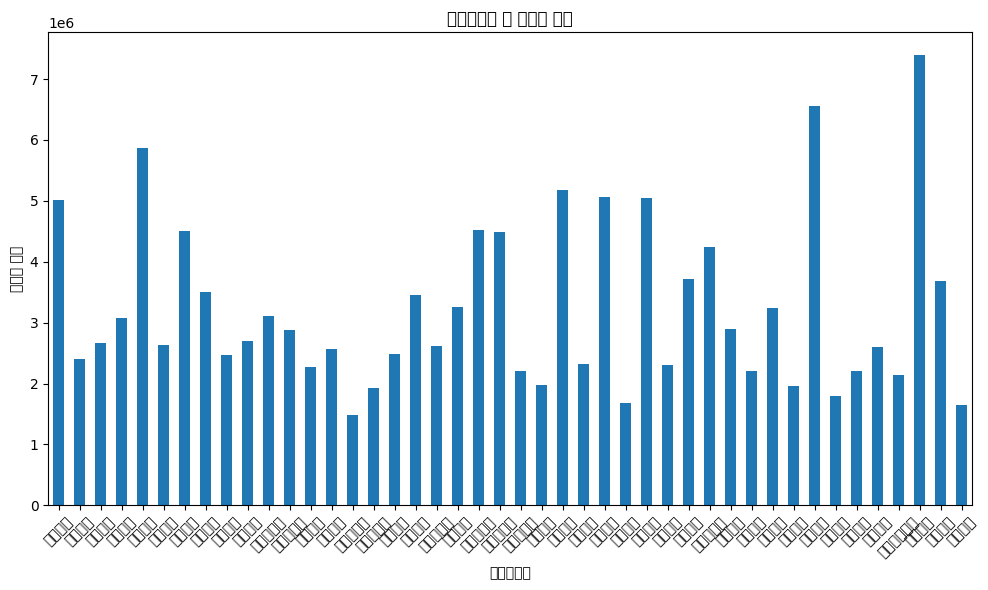

In [ ]:
import matplotlib.pyplot as plt

# 한글을 지원하는 폰트 설정 (예: DejaVu Sans)
plt.rcParams['font.family'] = 'DejaVu Sans'

import pandas as pd

# 데이터 읽기
df = pd.read_csv(output_path_csv, encoding='cp949')

# 'KTT월정료(조정)' 컬럼을 숫자형으로 변환 (콤마 제거 후 정수형으로 변환)
df['KTT월정료(조정)'] = df['KTT월정료(조정)'].str.replace(',', '').astype(int)

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('관리지사명')
plt.ylabel('월정료 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

TypeError: no numeric data to plot

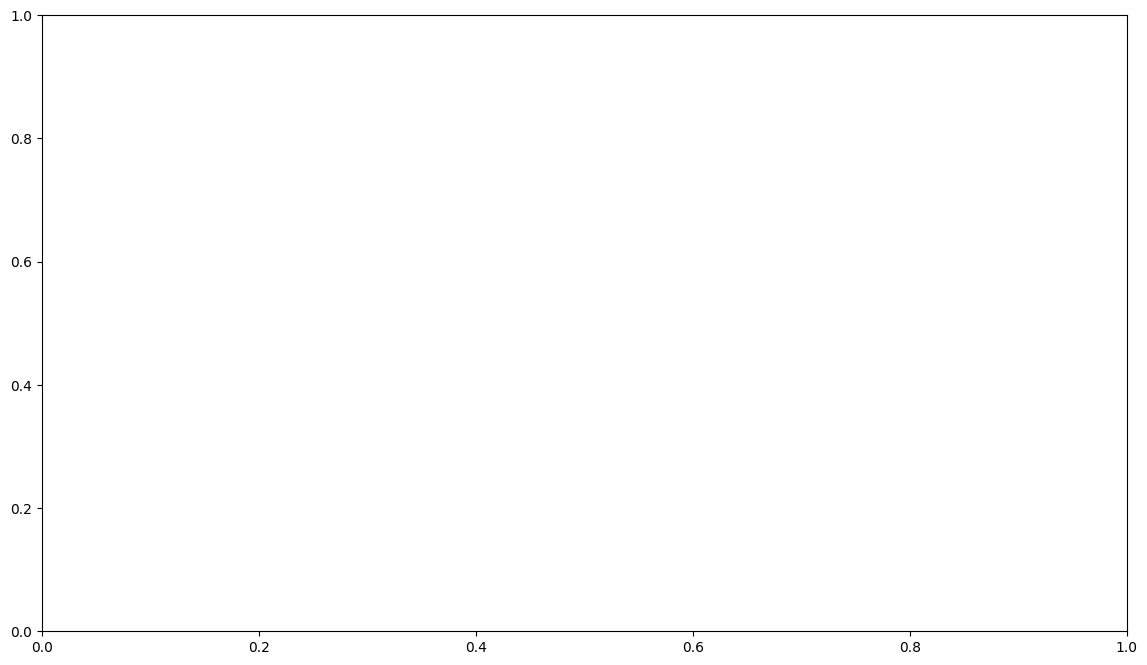

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 읽기
df = pd.read_csv('/content/drive/My Drive/data/해지_조건추출.csv', encoding='cp949')

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화
plt.figure(figsize=(14, 8))  # 그래프 크기 확대
grouped_df.plot(kind='bar')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('관리지사명')
plt.ylabel('월정료 합계 (천단위)')
plt.xticks(rotation=75)  # X축 레이블 각도 조정

# X축 레이블 간격 조정 (간격을 두고 일부만 표시)
plt.xticks(ticks=range(0, len(grouped_df.index)), labels=grouped_df.index, rotation=75)
plt.tight_layout()

# 그래프 출력
plt.show()

<ipython-input-24-0b373c6d1f73>:19: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0b373c6d1f73>:19: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0b373c6d1f73>:19: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0b373c6d1f73>:19: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0b373c6d1f73>:19: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0b373c6d1f73>:19: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0b373c6d1f73>:19: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
<ipython-input-24-0b373c6d1f73>:19: UserWarning: Gl

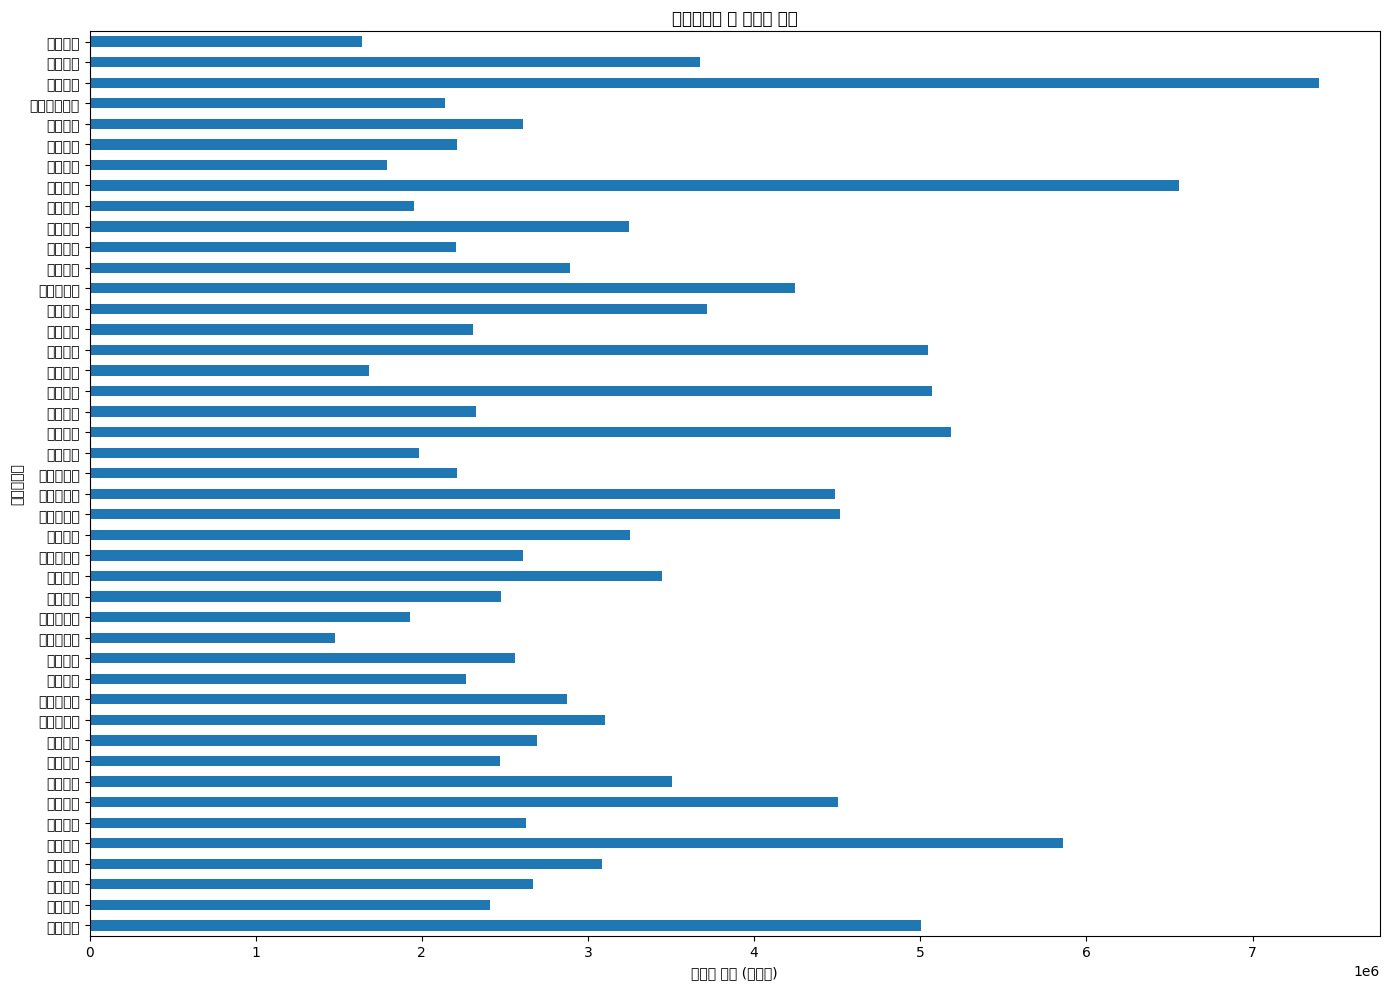

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 읽기
df = pd.read_csv('/content/drive/My Drive/data/해지_조건추출.csv', encoding='cp949')

# KTT월정료(조정) 열을 숫자형으로 변환 (쉼표 제거 후 변환)
df['KTT월정료(조정)'] = df['KTT월정료(조정)'].str.replace(',', '').astype(float)

# 관리지사명 별 KTT월정료(조정) 합계를 계산
grouped_df = df.groupby('관리지사명')['KTT월정료(조정)'].sum()

# 시각화 (가로 막대 그래프)
plt.figure(figsize=(14, 10))  # 그래프 크기 확대
grouped_df.plot(kind='barh')
plt.title('관리지사명 별 월정료 합계')
plt.xlabel('월정료 합계 (천단위)')
plt.ylabel('관리지사명')
plt.tight_layout()

# 그래프 출력
plt.show()